# Train Data

In [85]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [27]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [28]:
data.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [29]:
data['Treated_with_drugs'] = data['Treated_with_drugs'].str.upper()

In [30]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [31]:
def smoker(r):
  if (r == "NO") or (r == "NO "):
    return 'NO'
  elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
    return 'YES'
  else:
    return 'Cannot say'

data.Patient_Smoker = data.Patient_Smoker.apply(smoker)  # Applying the function

In [32]:
data.Patient_Rural_Urban.value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [24]:
data.Patient_mental_condition.value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

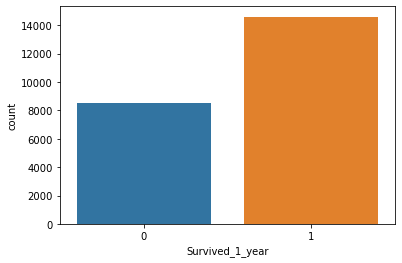

In [34]:
sns.countplot(x='Survived_1_year', data=data)
plt.show()

In [35]:
numeric_features = data.select_dtypes(include=[np.number])    # select_dtypes helps you to select data of particular types 
numeric_features.columns


Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [36]:
numeric_data=data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond', 'Survived_1_year']]  #keeping in the target varibale for analysis purposes
numeric_data.head()


,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,2.0,0
1,5,36,22.945566,1.0,1
2,23,48,27.510027,1.0,0
3,51,5,19.130976,1.0,1
4,0,128,1.348400,1.0,1


In [37]:
numeric_data.isnull().sum()


Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1235
Survived_1_year               0
dtype: int64

In [38]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])  # filling the missing value of 'Number_of_prev_cond'

numeric_data['Number_of_prev_cond']=data['Number_of_prev_cond']
numeric_data.isnull().sum()


Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

In [39]:
numeric_data.describe()


,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000
mean,26.413127,33.209768,23.454820,1.710352,0.632247
std,15.030865,19.549882,3.807661,0.768216,0.482204
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205550,1.000000,0.000000
50%,26.000000,33.000000,23.386199,2.000000,1.000000
75%,39.000000,50.000000,26.788154,2.000000,1.000000
max,52.000000,149.000000,29.999579,5.000000,1.000000


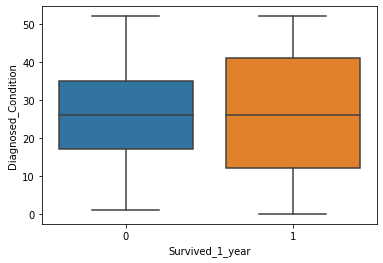

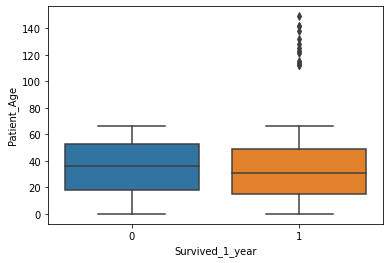

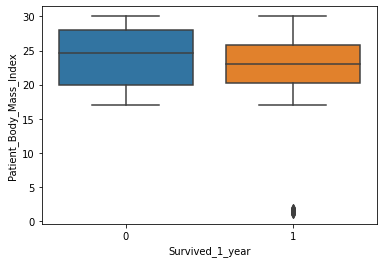

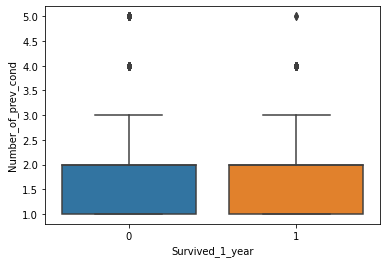

In [40]:
for feature in numeric_data.drop('Survived_1_year', axis = 1).columns:
  sns.boxplot(x='Survived_1_year', y=feature, data=numeric_data)
  plt.show()



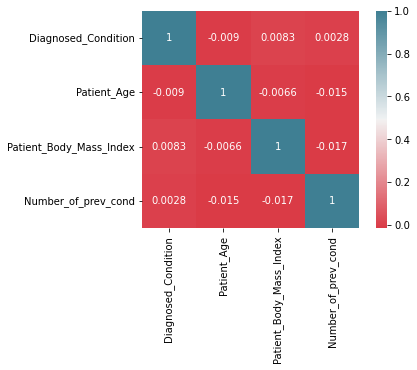

In [41]:
numeric_data=numeric_data.drop(['Survived_1_year'], axis=1)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(numeric_data.corr(),
            cmap = colormap,
            square = True,
            annot = True)
plt.show()


In [42]:
data.isnull().sum()


ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

In [43]:
data['Treated_with_drugs']=data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [44]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [45]:
data.isnull().sum()


ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [46]:
categorical_data = data.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.drop(['Patient_ID', 'ID_Patient_Care_Situation'], axis=1, inplace = True)    # dropping the id columns form the dataframe 'categorical data'
categorical_data.head()    # Now we are left with categorical columns only. take a look at first five observaitons

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,DX6,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,DX2,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,DX1,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,DX6,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [47]:
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

Treated_with_drugs          32
Patient_Smoker               3
Patient_Rural_Urban          2
Patient_mental_condition     1
A                            2
B                            2
C                            2
D                            2
E                            2
F                            2
Z                            2
Survived_1_year              2
dtype: int64

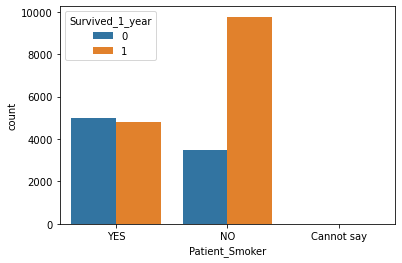

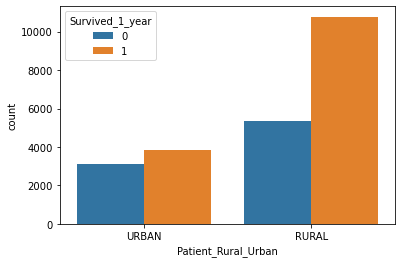

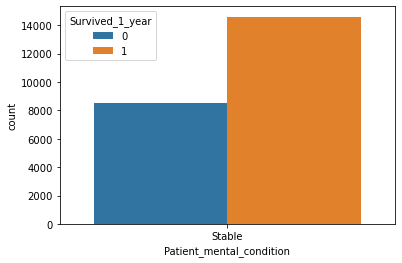

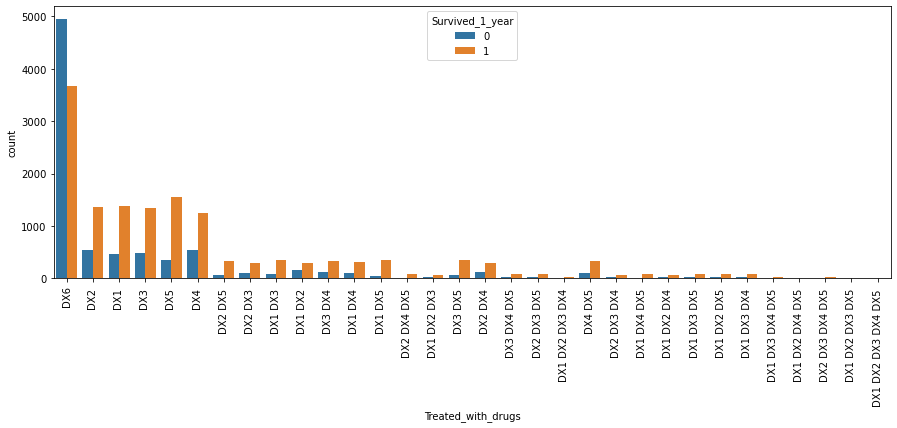

In [48]:
# Visualization of categorical columns
for feature in ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']:
  sns.countplot(x=feature,  hue='Survived_1_year', data=categorical_data)
  plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=categorical_data)
plt.xticks(rotation=90)
plt.show()


In [49]:
drugs = data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [50]:


data = pd.concat([data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
data = data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

data.head()



,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,18.479385,YES,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,48,27.510027,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,33012,0,12513,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


In [51]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [52]:
data.Patient_Smoker[data['Patient_Smoker'] == "Cannot say"] = 'NO'

In [53]:
data.drop('Patient_mental_condition', axis = 1, inplace=True)



In [54]:


data = pd.get_dummies(data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])



In [55]:


data.head()



,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,0,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Patient_Age                23097 non-null  int64  
 4   Patient_Body_Mass_Index    23097 non-null  float64
 5   A                          23097 non-null  float64
 6   B                          23097 non-null  float64
 7   C                          23097 non-null  float64
 8   D                          23097 non-null  float64
 9   E                          23097 non-null  float64
 10  F                          23097 non-null  float64
 11  Z                          23097 non-null  float64
 12  Number_of_prev_cond        23097 non-null  float64
 13  Survived_1_year            23097 non-null  int

In [57]:
print(data.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(data.Patient_ID.nunique())


23097
10570


In [58]:
data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

In [59]:
X = data.drop('Survived_1_year',axis = 1)
y = data['Survived_1_year']


In [60]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Linear Regression

In [61]:


model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

In [62]:


pred = model.predict(X_test)



In [63]:
print(f1_score(y_test,pred))


0.7874015748031497


# Random Forest

In [64]:


from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier



In [65]:


forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)



RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [66]:
y_pred = forest.predict(X_test)

fscore = f1_score(y_test ,y_pred)
fscore


0.8220447284345048

# Random Forest and Boruta

In [67]:
!pip install Boruta


     |████████████████████████████████| 56 kB 1.3 MB/s eta 0:00:01


In [68]:


from boruta import BorutaPy



In [69]:


boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       #

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=123,
                                          random_state=RandomState(MT19937) at 0x7FEABE066B40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FEABE066B40, verbose=2)

In [70]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)


Selected Features:  [ True False  True  True  True  True False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 2 1 1 1 1 3 1 4 5 6 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  17


In [71]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
...,...,...
1,Patient_ID,2
6,C,3
8,E,4
9,F,5


In [72]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))


In [73]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)


RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)

In [74]:


y_important_pred = rf_important.predict(X_important_test)
rf_imp_fscore = f1_score(y_test, y_important_pred)



In [75]:


print(rf_imp_fscore)



0.8578215134034612


# Hyper Parameter Tunning

In [76]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [77]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)


In [78]:
grid_search.fit(X_important_train, y_train)


Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [79]:
grid_search.best_params_


{'bootstrap': True, 'max_depth': 15, 'n_estimators': 500}

In [80]:


pred = grid_search.predict(X_important_test)



In [81]:
f1_score(y_test, pred)

0.8657267539442766

# Test Data

In [83]:
test_new_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv")


[CV] END .....bootstrap=True, max_depth=10, n_estimators=500; total time=   7.3s
[CV] END ....bootstrap=True, max_depth=15, n_estimators=1000; total time=  17.8s
[CV] END .....bootstrap=True, max_depth=10, n_estimators=500; total time=   7.2s
[CV] END ....bootstrap=True, max_depth=15, n_estimators=1000; total time=  17.9s


In [84]:
test_new_data.head()


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


[CV] END .....bootstrap=True, max_depth=5, n_estimators=1000; total time=   9.7s
[CV] END .....bootstrap=False, max_depth=5, n_estimators=500; total time=   5.4s
[CV] END ...bootstrap=False, max_depth=10, n_estimators=1000; total time=  16.0s
[CV] END .....bootstrap=True, max_depth=5, n_estimators=1000; total time=   9.7s
[CV] END .....bootstrap=False, max_depth=5, n_estimators=500; total time=   5.4s
[CV] END ...bootstrap=False, max_depth=10, n_estimators=1000; total time=  16.1s
[CV] END ....bootstrap=True, max_depth=10, n_estimators=1000; total time=  14.5s
[CV] END ....bootstrap=False, max_depth=10, n_estimators=500; total time=   8.6s
[CV] END ....bootstrap=False, max_depth=15, n_estimators=500; total time=   9.4s
[CV] END ....bootstrap=True, max_depth=10, n_estimators=1000; total time=  14.5s
[CV] END ....bootstrap=False, max_depth=10, n_estimators=500; total time=   8.6s
[CV] END ....bootstrap=False, max_depth=15, n_estimators=500; total time=   9.5s
[CV] END ......bootstrap=Tru

In [86]:
test_new_data.Treated_with_drugs.value_counts()

DX6                     3462
DX4                      785
DX5                      782
DX1                      753
DX3                      747
DX2                      745
DX2 DX4                  181
DX2 DX3                  179
DX1 DX5                  166
DX2 DX5                  165
DX3 DX5                  161
DX1 DX2                  160
DX4 DX5                  157
DX1 DX4                  153
DX1 DX3                  152
DX3 DX4                  148
DX1 DX3 DX4               41
DX1 DX2 DX5               41
DX2 DX3 DX4               40
DX1 DX2 DX3               40
DX3 DX4 DX5               40
DX1 DX2 DX4               38
DX2 DX3 DX5               37
DX1 DX4 DX5               34
DX2 DX4 DX5               33
DX1 DX3 DX5               23
DX1 DX3 DX4 DX5           11
DX2 DX3 DX4 DX5            8
DX1 DX2 DX4 DX5            8
DX1 DX2 DX3 DX5            6
DX1 DX2 DX3 DX4            5
DX1 DX2 DX3 DX4 DX5        2
Name: Treated_with_drugs, dtype: int64

In [87]:
test_new_data['Treated_with_drugs'] = test_new_data['Treated_with_drugs'].str.upper()

In [88]:
test_new_data.Patient_Smoker.value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [90]:
def smoker(r):
  if (r == "NO") or (r == "NO "):
    return 'NO'
  elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
    return 'YES'
  else:
    return 'Cannot say'

test_new_data.Patient_Smoker = test_new_data.Patient_Smoker.apply(smoker)


In [91]:
test_new_data.Patient_Rural_Urban.value_counts()

RURAL    6502
URBAN    2801
Name: Patient_Rural_Urban, dtype: int64

In [92]:
test_new_data.Patient_mental_condition.value_counts()

Stable    9303
Name: Patient_mental_condition, dtype: int64

In [93]:
test_new_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [94]:
drugs = test_new_data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries
drugs.head()


,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,1,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [95]:
test_new_data = pd.concat([test_new_data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
test_new_data = test_new_data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are splitted into different columns

test_new_data.head()


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,16,29.443894,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,0,0,1,0,0,0
1,23216,52,986,24,26.836321,NO,URBAN,Stable,1.0,1.0,...,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,0,0,0,1,1,0
3,7149,32,3292,42,27.171155,NO,URBAN,Stable,1.0,0.0,...,1.0,0.0,0.0,3.0,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,0


In [96]:
test_new_data.Patient_Smoker.value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [97]:
test_new_data.drop('Patient_mental_condition', axis = 1, inplace=True)

In [98]:
test_new_data = pd.get_dummies(test_new_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [99]:
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,19150,40,3709,16,29.443894,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,23216,52,986,24,26.836321,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2,11890,50,11821,63,25.523280,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,1,0,1,0,1,0
3,7149,32,3292,42,27.171155,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,1,1,0,0,1
4,22845,20,9959,50,25.556192,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0


In [100]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Patient_Age                9303 non-null   int64  
 4   Patient_Body_Mass_Index    9303 non-null   float64
 5   A                          9303 non-null   float64
 6   B                          9303 non-null   float64
 7   C                          9303 non-null   float64
 8   D                          9303 non-null   float64
 9   E                          9303 non-null   float64
 10  F                          9303 non-null   float64
 11  Z                          9303 non-null   float64
 12  Number_of_prev_cond        9303 non-null   float64
 13  DX1                        9303 non-null   int64

In [101]:
test_new_data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

In [102]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        9303 non-null   int64  
 1   Patient_ID                 9303 non-null   int64  
 2   Patient_Age                9303 non-null   int64  
 3   Patient_Body_Mass_Index    9303 non-null   float64
 4   A                          9303 non-null   float64
 5   B                          9303 non-null   float64
 6   C                          9303 non-null   float64
 7   D                          9303 non-null   float64
 8   E                          9303 non-null   float64
 9   F                          9303 non-null   float64
 10  Z                          9303 non-null   float64
 11  Number_of_prev_cond        9303 non-null   float64
 12  DX1                        9303 non-null   int64  
 13  DX2                        9303 non-null   int64

# Prediction

In [103]:
imp_test_features = boruta_selector.transform(np.array(test_new_data))

In [104]:
prediction = grid_search.predict(imp_test_features)

In [ ]:
res = pd.DataFrame(prediction)
res.index = test_new_data.index 
res.columns = ["prediction"]

res.to_csv('prediction_results_HP.csv') 
files.download('prediction_results_HP.csv')
